# **Understanding Data**

In [33]:
import pandas as pd

# Load the training and test datasets
train_data = pd.read_csv('/kaggle/input/bike-rental/train.csv')
test_data = pd.read_csv('/kaggle/input/bike-rental/test.csv')

# View the first few rows of the dataset
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Data Preprocessing**
1. Convert datetime column datatype to Datetime Format

In [34]:
train_data['datetime'] = pd.to_datetime(train_data['datetime'])
test_data['datetime'] = pd.to_datetime(test_data['datetime'])

# Extract features: hour, day, month, year, and day_of_week
for dataset in [train_data, test_data]:
    dataset['hour'] = dataset['datetime'].dt.hour
    dataset['day'] = dataset['datetime'].dt.day
    dataset['month'] = dataset['datetime'].dt.month
    dataset['year'] = dataset['datetime'].dt.year
    dataset['day_of_week'] = dataset['datetime'].dt.dayofweek
    dataset['is_weekend'] = dataset['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Check new features
train_data[['datetime', 'hour', 'day', 'month', 'year', 'day_of_week', 'is_weekend']].head()


,datetime,hour,day,month,year,day_of_week,is_weekend
0,2011-01-01 00:00:00,0,1,1,2011,5,1
1,2011-01-01 01:00:00,1,1,1,2011,5,1
2,2011-01-01 02:00:00,2,1,1,2011,5,1
3,2011-01-01 03:00:00,3,1,1,2011,5,1
4,2011-01-01 04:00:00,4,1,1,2011,5,1


2. Checking for Missing Values to ensure there are no missing values.

In [35]:
# Check for missing values
train_data.isnull().sum(), test_data.isnull().sum()


(datetime       0
 season         0
 holiday        0
 workingday     0
 weather        0
 temp           0
 atemp          0
 humidity       0
 windspeed      0
 casual         0
 registered     0
 count          0
 hour           0
 day            0
 month          0
 year           0
 day_of_week    0
 is_weekend     0
 dtype: int64,
 datetime       0
 season         0
 holiday        0
 workingday     0
 weather        0
 temp           0
 atemp          0
 humidity       0
 windspeed      0
 hour           0
 day            0
 month          0
 year           0
 day_of_week    0
 is_weekend     0
 dtype: int64)

**Creating Bins-**
* Hour bins: Group hours into categories like morning, afternoon, etc.
* Holiday-Weekend interaction: Identify if it's both a holiday and a weekend.

In [36]:
# Hour bins: Define parts of the day
train_data['hour_bin'] = pd.cut(train_data['hour'], bins=[0, 6, 12, 18, 24], labels=['night', 'morning', 'afternoon', 'evening'])

# Create interaction between holiday and weekend
train_data['holiday_weekend'] = (train_data['holiday'] == 1) & (train_data['is_weekend'] == 1)


**Checking the distribution of the target variable count to determine if transformation is needed.**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


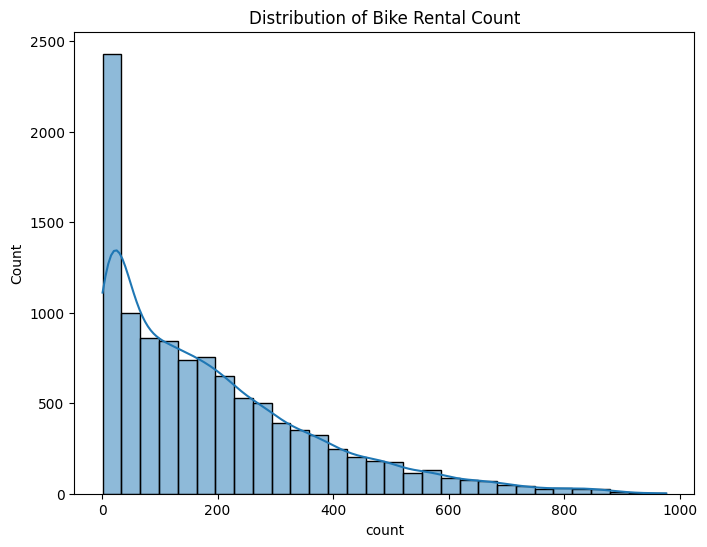

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
plt.figure(figsize=(8,6))
sns.histplot(train_data['count'], bins=30, kde=True)
plt.title('Distribution of Bike Rental Count')
plt.show()


**Identifying correlations between features and the target variable.**

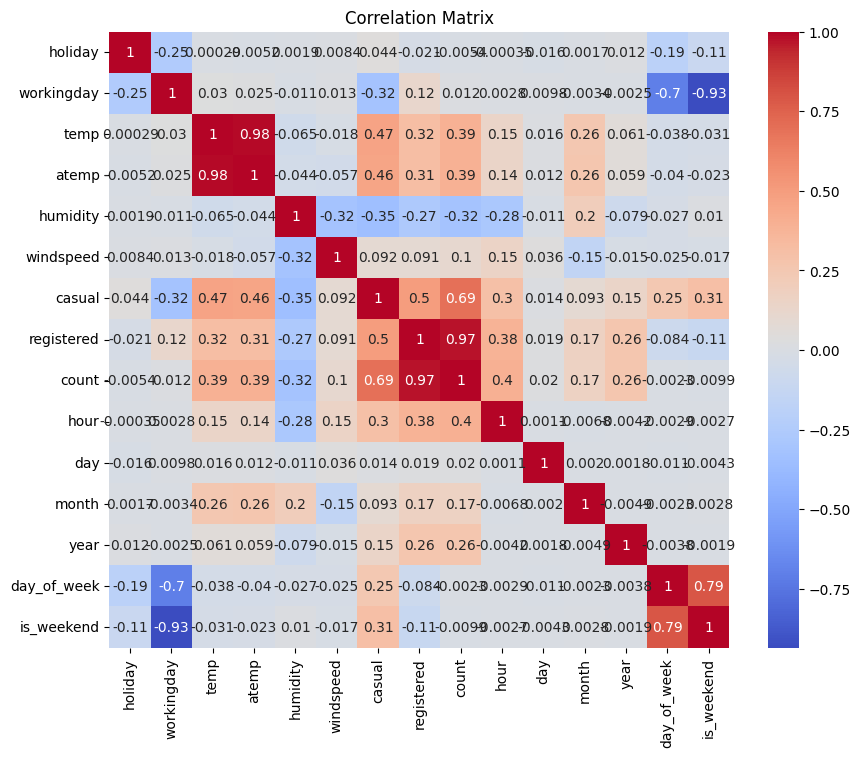

In [38]:
import numpy as np
train_data_encoded = pd.get_dummies(train_data, columns=['season', 'weather', 'hour_bin'], drop_first=True)

# Now use the encoded data for the correlation matrix
numeric_columns = train_data_encoded.select_dtypes(include=[np.number])
# Importi
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Visualizing bike rental count against different features, such as hour, season, weather, etc.

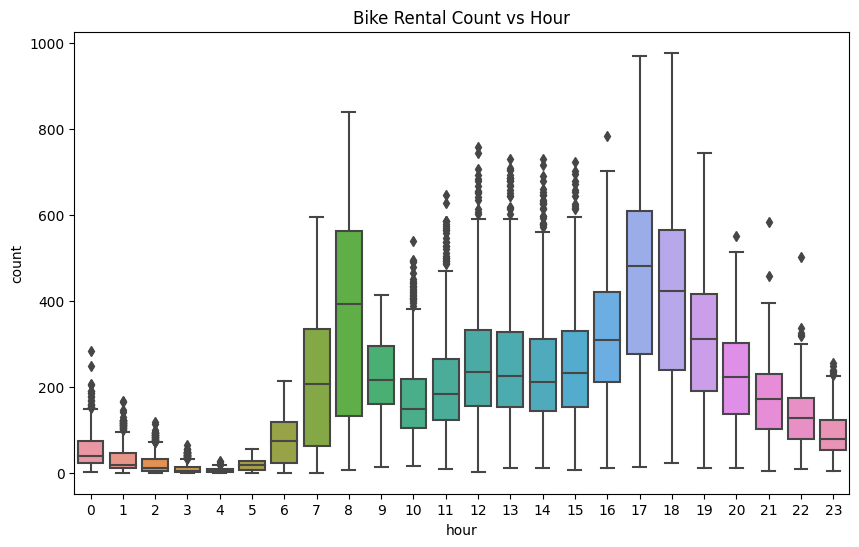

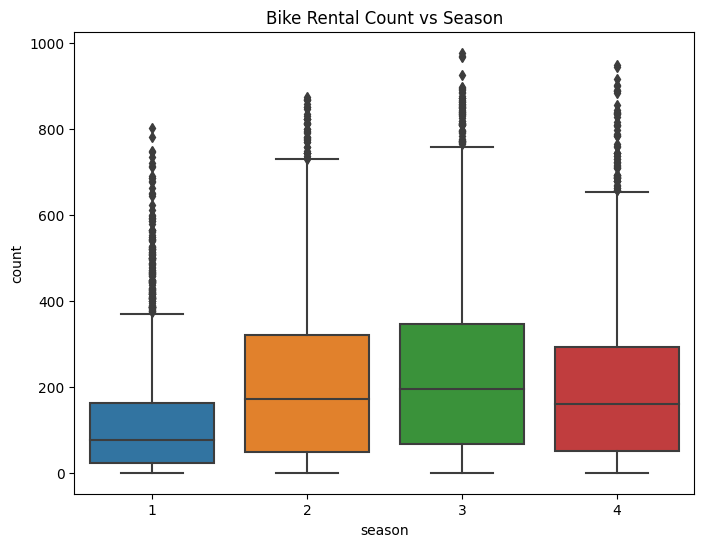

In [39]:
# Boxplot: Bike count vs. hour of the day
plt.figure(figsize=(10,6))
sns.boxplot(x='hour', y='count', data=train_data)
plt.title('Bike Rental Count vs Hour')
plt.show()

# Boxplot: Bike count vs season
plt.figure(figsize=(8,6))
sns.boxplot(x='season', y='count', data=train_data)
plt.title('Bike Rental Count vs Season')
plt.show()


In [40]:
# Check if the columns are in the train and test datasets
print("Train Columns:", train_data.columns)
print("Test Columns:", test_data.columns)


Train Columns: Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'hour', 'day', 'month', 'year', 'day_of_week', 'is_weekend', 'hour_bin',
       'holiday_weekend'],
      dtype='object')
Test Columns: Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'hour', 'day', 'month', 'year',
       'day_of_week', 'is_weekend'],
      dtype='object')


**For categorical variables (e.g., season, weather, hour_bin), we need to convert them into numerical representations**

In [41]:
# List of columns to be encoded
columns_to_encode = ['season', 'weather', 'hour_bin']

# Check which columns are present in the train and test datasets
columns_in_train = [col for col in columns_to_encode if col in train_data.columns]
columns_in_test = [col for col in columns_to_encode if col in test_data.columns]

# Apply one-hot encoding only to the existing columns
if columns_in_train:
    train_data = pd.get_dummies(train_data, columns=columns_in_train, drop_first=True)
if columns_in_test:
    test_data = pd.get_dummies(test_data, columns=columns_in_test, drop_first=True)


**Droping Unnecessary Columns for data modelling**

In [42]:
X = train_data.drop(['casual', 'registered', 'count', 'datetime'], axis=1)
y = train_data['count']


**Split the training data into training and validation sets for model evaluation**

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


# **Building Models**

**1. Linear Regression**

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on validation set
y_pred = lin_reg.predict(X_valid)

# Evaluate the model
rmse = mean_squared_error(y_valid, y_pred, squared=False)
print(f'Linear Regression RMSE: {rmse}')


Linear Regression RMSE: 120.31347877801268


**2. Random Forest Regressor**

In [45]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on validation set
y_pred_rf = rf.predict(X_valid)

# Evaluate the model
rmse_rf = mean_squared_error(y_valid, y_pred_rf, squared=False)
print(f'Random Forest RMSE: {rmse_rf}')


Random Forest RMSE: 38.83325676756188


**3. Gradient Boosting (XGBoost)**

In [46]:
import xgboost as xgb

# Initialize and train the model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on validation set
y_pred_xgb = xgb_model.predict(X_valid)

# Evaluate the model
rmse_xgb = mean_squared_error(y_valid, y_pred_xgb, squared=False)
print(f'XGBoost RMSE: {rmse_xgb}')


XGBoost RMSE: 36.6290285357186


**On evaluating the models based on RMSE (Root Mean Squared Error).
The Gradient Boosting (XGBoost) models is having lower rmse so we proceed with hyperparameter tuning.**

In [47]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Define the model
xgb_model = xgb.XGBRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize RandomizedSearchCV (faster than GridSearchCV for large grids)
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_iter=10, n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params_xgb = random_search.best_params_
print(f'Best parameters for XGBoost: {best_params_xgb}')

# Predict using the best model
best_xgb = random_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_valid)

# Evaluate the tuned model
rmse_xgb = mean_squared_error(y_valid, y_pred_xgb, squared=False)
print(f'Tuned XGBoost RMSE: {rmse_xgb}')


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Tuned XGBoost RMSE: 35.17800553400168


In [48]:
# List columns in the train_data after preprocessing (the ones used for training the model)
print("Columns in train_data after preprocessing:")
print(train_data.columns)


Columns in train_data after preprocessing:
Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'hour', 'day', 'month',
       'year', 'day_of_week', 'is_weekend', 'holiday_weekend', 'season_2',
       'season_3', 'season_4', 'weather_2', 'weather_3', 'weather_4',
       'hour_bin_morning', 'hour_bin_afternoon', 'hour_bin_evening'],
      dtype='object')


In [49]:
# List columns in the test_data after preprocessing
print("Columns in test_data after preprocessing:")
print(test_data.columns)


Columns in test_data after preprocessing:
Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'hour', 'day', 'month', 'year', 'day_of_week',
       'is_weekend', 'season_2', 'season_3', 'season_4', 'weather_2',
       'weather_3', 'weather_4'],
      dtype='object')


In [50]:
def assign_hour_bin(hour):
    if 0 <= hour < 6:
        return 'night'
    elif 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'evening'

test_data['hour_bin'] = test_data['hour'].apply(assign_hour_bin)


In [51]:
test_data['holiday_weekend'] = ((test_data['holiday'] == 1) | (test_data['is_weekend'] == 1)).astype(int)


In [52]:
test_data = pd.get_dummies(test_data, columns=['season_2', 'weather_2', 'hour_bin'], drop_first=True)


In [53]:
# Add missing columns to test_data with default value 0
missing_cols = set(train_data.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0

# Align test_data columns with train_data (drop 'count' from train_data)
test_data = test_data[train_data.columns.drop('count')]  # Drop the target column 'count' from train_data for alignment


In [54]:
# Drop the 'datetime' column from test_data before prediction
test_data_clean = test_data.drop(columns=['datetime'])


In [55]:
print(test_data_clean.dtypes)


holiday                 int64
workingday              int64
temp                  float64
atemp                 float64
humidity                int64
windspeed             float64
casual                  int64
registered              int64
hour                    int32
day                     int32
month                   int32
year                    int32
day_of_week             int32
is_weekend              int64
holiday_weekend         int64
season_2                int64
season_3                 bool
season_4                 bool
weather_2               int64
weather_3                bool
weather_4                bool
hour_bin_morning         bool
hour_bin_afternoon      int64
hour_bin_evening         bool
dtype: object


In [56]:
print(test_data.dtypes)

datetime              datetime64[ns]
holiday                        int64
workingday                     int64
temp                         float64
atemp                        float64
humidity                       int64
windspeed                    float64
casual                         int64
registered                     int64
hour                           int32
day                            int32
month                          int32
year                           int32
day_of_week                    int32
is_weekend                     int64
holiday_weekend                int64
season_2                       int64
season_3                        bool
season_4                        bool
weather_2                      int64
weather_3                       bool
weather_4                       bool
hour_bin_morning                bool
hour_bin_afternoon             int64
hour_bin_evening                bool
dtype: object


In [57]:
# Drop 'casual' and 'registered' from test data
test_data_clean = test_data_clean.drop(columns=['casual', 'registered'], errors='ignore')


In [58]:
# Use the trained XGBoost model to predict on the cleaned test data
test_predictions = best_xgb.predict(test_data_clean)

# Convert predictions to a DataFrame for submission
test_predictions_df = pd.DataFrame({
    'datetime': test_data['datetime'],  # Re-attach datetime if needed
    'predicted_count': test_predictions
})




**Steps after Making Predictions:**

In [59]:
# Summary of predictions
print(test_predictions_df.describe())


                            datetime  predicted_count
count                           6493      6493.000000
mean   2012-01-13 09:27:47.765285632       192.196136
min              2011-01-20 00:00:00        -2.353562
25%              2011-07-22 15:00:00        49.807076
50%              2012-01-20 23:00:00       157.576462
75%              2012-07-20 17:00:00       296.205353
max              2012-12-31 23:00:00       794.191467
std                              NaN       162.870789


Plot the Distribution of Predictions:
Whether or not you have the true labels, you can visualize the distribution of your predictions.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


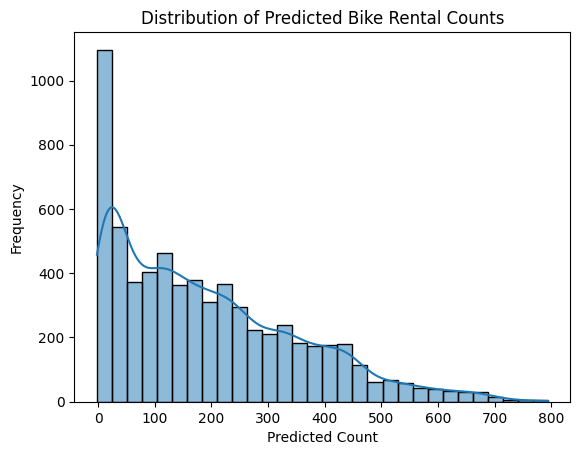

In [60]:
import seaborn as sns

# Plot distribution of predicted values
sns.histplot(test_predictions, bins=30, kde=True)
plt.title('Distribution of Predicted Bike Rental Counts')
plt.xlabel('Predicted Count')
plt.ylabel('Frequency')
plt.show()


Plot Predictions Over Time:
If you want to see how the predictions vary over time, you can plot the predicted counts against the datetime column.


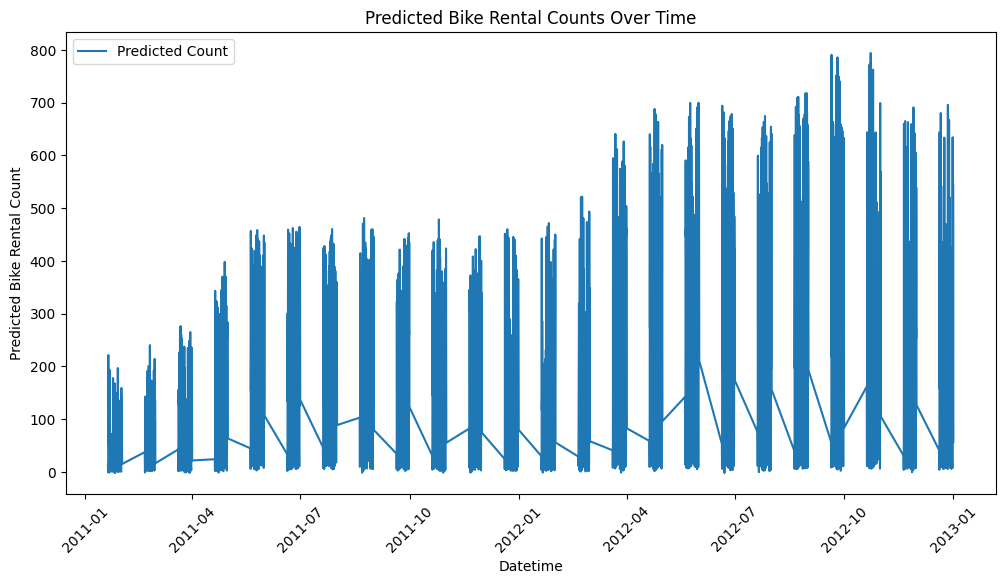

In [61]:
# Plot predictions over time
plt.figure(figsize=(12, 6))
plt.plot(test_data['datetime'], test_predictions, label='Predicted Count')
plt.xlabel('Datetime')
plt.ylabel('Predicted Bike Rental Count')
plt.title('Predicted Bike Rental Counts Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [62]:
# Save the predictions to a CSV file
test_predictions_df.to_csv('xgb_test_predictions.csv', index=False)

print("Predictions saved to 'xgb_test_predictions.csv' for submission.")

Predictions saved to 'xgb_test_predictions.csv' for submission.
